In [1]:
pip install pandas numpy scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Try reading with ISO-8859-1 encoding
data = pd.read_csv('/Users/anapaulavaladez/Desktop/Python 4/Data.csv', encoding='ISO-8859-1')

In [6]:
import pandas as pd

# Read the file while handling errors
data = pd.read_csv('/Users/anapaulavaladez/Desktop/Python 4/Data.csv', encoding='utf-8', errors='replace')
# Alternatively, you can use errors='ignore'
data = pd.read_csv('/Users/anapaulavaladez/Desktop/Python 4/Data.csv', encoding='utf-8', errors='ignore')


TypeError: read_csv() got an unexpected keyword argument 'errors'

In [7]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [9]:
import chardet

# Detect the encoding
with open('/Users/anapaulavaladez/Desktop/Python 4/Data.csv', 'rb') as file:
    result = chardet.detect(file.read(10000))
    encoding = result['encoding']

# Read the file with the detected encoding
data = pd.read_csv('/Users/anapaulavaladez/Desktop/Python 4/Data.csv', encoding=encoding)

In [12]:
import pandas as pd

# Open the file in the original encoding and then save it as UTF-8
with open('/Users/anapaulavaladez/Desktop/Python 4/Data.csv', 'r', encoding='ISO-8859-1') as file:
    content = file.read()

with open('/Users/anapaulavaladez/Desktop/Python 4/Data.csv', 'w', encoding='utf-8') as file:
    file.write(content)

# Now read the newly saved UTF-8 file
data = pd.read_csv('/Users/anapaulavaladez/Desktop/Python 4/Data.csv')


In [13]:
# Check for missing values
print(data.isnull().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64


In [15]:
# Inspect the first few rows and the column names
print(data.head())
print(data.columns)

         Date  Label                                               Top1  \
0  2000-01-03      0  A 'hindrance to operations': extracts from the...   
1  2000-01-04      0                                          Scorecard   
2  2000-01-05      0                  Coventry caught on counter by Flo   
3  2000-01-06      1                      Pilgrim knows how to progress   
4  2000-01-07      1                               Hitches and Horlocks   

                                 Top2  \
0                           Scorecard   
1                 The best lake scene   
2  United's rivals on the road to Rio   
3                 Thatcher facing ban   
4      Beckham off but United survive   

                                            Top3  \
0                Hughes' instant hit buoys Blues   
1                  Leader: German sleaze inquiry   
2  Thatcher issues defence before trial by video   
3        McIlroy calls for Irish fighting spirit   
4                        Breast cancer scr

In [16]:
# Concatenate headline columns
headline_columns = ['Top' + str(i) for i in range(1, 26)]
data['all_headlines'] = data[headline_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Inspect the concatenated column
print(data[['Date', 'Label', 'all_headlines']].head())


         Date  Label                                      all_headlines
0  2000-01-03      0  A 'hindrance to operations': extracts from the...
1  2000-01-04      0  Scorecard The best lake scene Leader: German s...
2  2000-01-05      0  Coventry caught on counter by Flo United's riv...
3  2000-01-06      1  Pilgrim knows how to progress Thatcher facing ...
4  2000-01-07      1  Hitches and Horlocks Beckham off but United su...


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words
    words = [word for word in words if word.lower() not in stop_words]
    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Preprocess the concatenated headlines
data['processed_text'] = data['all_headlines'].apply(preprocess_text)

# Inspect the processed text
print(data[['Date', 'Label', 'processed_text']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anapaulavaladez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anapaulavaladez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anapaulavaladez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


         Date  Label                                     processed_text
0  2000-01-03      0  'hindrance operation ' : extract leaked report...
1  2000-01-04      0  Scorecard best lake scene Leader : German slea...
2  2000-01-05      0  Coventry caught counter Flo United 's rival ro...
3  2000-01-06      1  Pilgrim know progress Thatcher facing ban McIl...
4  2000-01-07      1  Hitches Horlocks Beckham United survive Breast...


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sid.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['processed_text'].apply(get_sentiment)

# Inspect the sentiment labels
print(data[['Date', 'Label', 'processed_text', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anapaulavaladez/nltk_data...


         Date  Label                                     processed_text  \
0  2000-01-03      0  'hindrance operation ' : extract leaked report...   
1  2000-01-04      0  Scorecard best lake scene Leader : German slea...   
2  2000-01-05      0  Coventry caught counter Flo United 's rival ro...   
3  2000-01-06      1  Pilgrim know progress Thatcher facing ban McIl...   
4  2000-01-07      1  Hitches Horlocks Beckham United survive Breast...   

  sentiment  
0  negative  
1  negative  
2  positive  
3  negative  
4  negative  


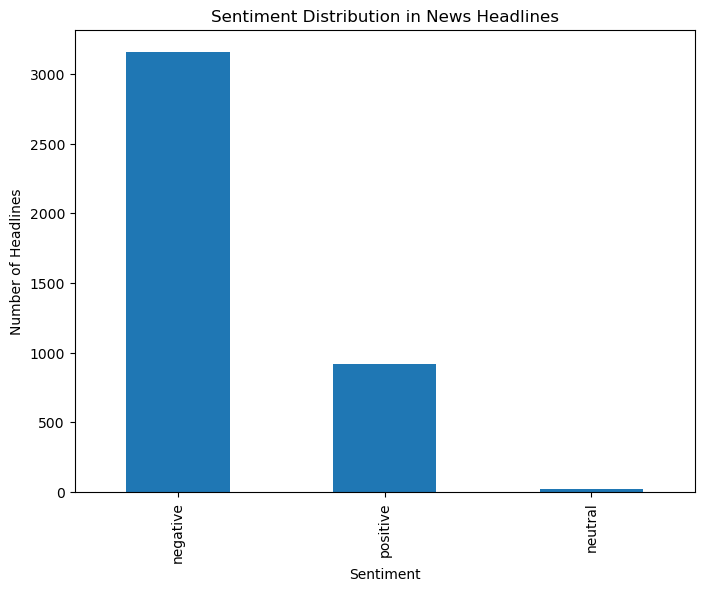

In [19]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution in News Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.show()

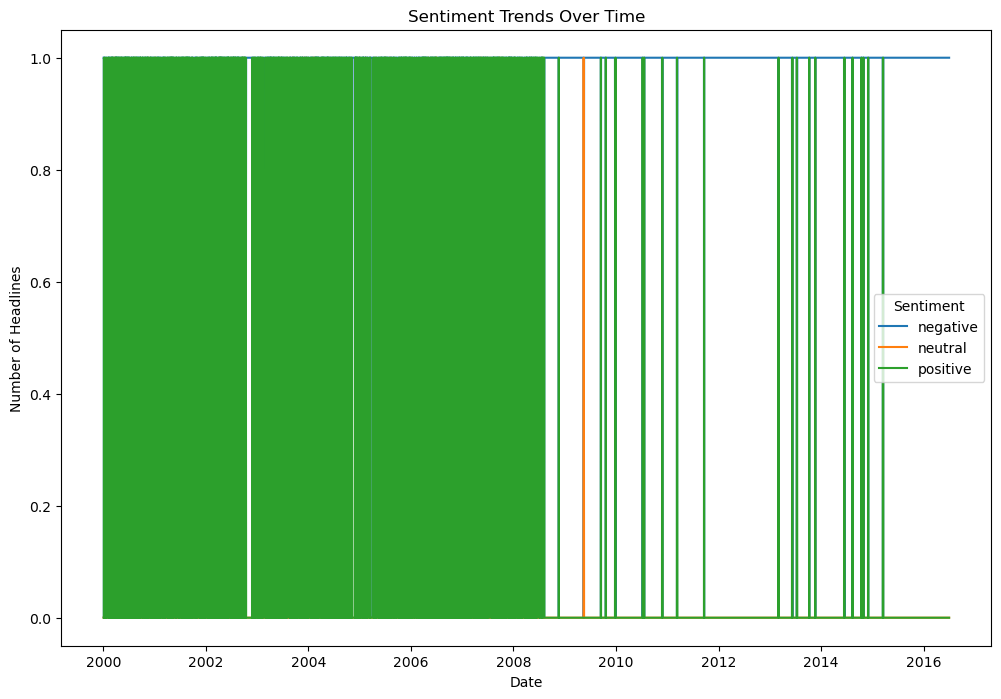

In [20]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Analyze sentiment trends over time
sentiment_over_time = data.groupby([data['Date'].dt.date, 'sentiment']).size().unstack().fillna(0)

# Plot sentiment trends over time
sentiment_over_time.plot(kind='line', figsize=(12, 8))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.legend(title='Sentiment')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Split the data into training and test sets
X = data['processed_text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.97      0.90       605
     neutral       0.00      0.00      0.00         6
    positive       0.81      0.48      0.60       210

    accuracy                           0.83       821
   macro avg       0.55      0.48      0.50       821
weighted avg       0.82      0.83      0.81       821



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
